# Tasca M8 T01

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


### Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

In [2]:
publis = pd.read_csv("PublicacionsFacebookThailandia.csv", sep=';')
publis.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

col_names = publis.columns.tolist()
print(col_names)

to_scale = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
scaled_features = publis[to_scale]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(scaled_features)
publis[to_scale] = scaled_features

publis.head()


['status_id', 'status_type', 'status_published', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,246675545449582_1648730588577397,video,4/21/2018 6:17,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748


In [21]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

In [22]:
# The lowest SSE value
kmeans.inertia_

# Final locations of the centroid
kmeans.cluster_centers_

# The number of iterations required to converge
kmeans.n_iter_

27

In [23]:
kmeans.labels_[:200]

array([2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3])

Tria del nombre de clústers més correcte
+ Elbow method

In [24]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

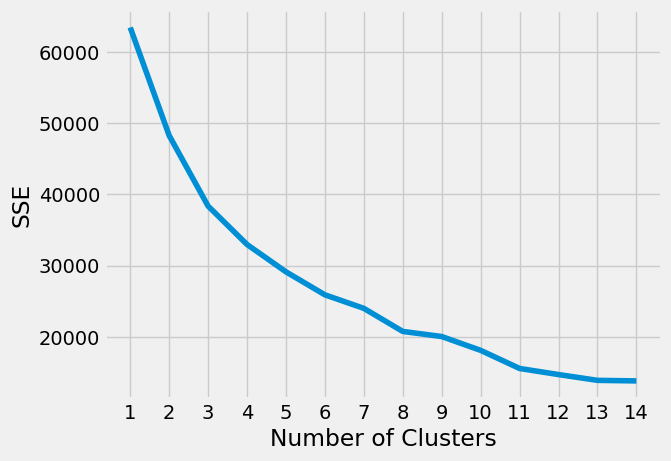

In [25]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 15), sse)
 plt.xticks(range(1, 15))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [26]:
kl = KneeLocator(
    range(1, 15), sse, curve="convex", direction="decreasing"
)

kl.elbow


5

+ Silhouette coefficient

In [27]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

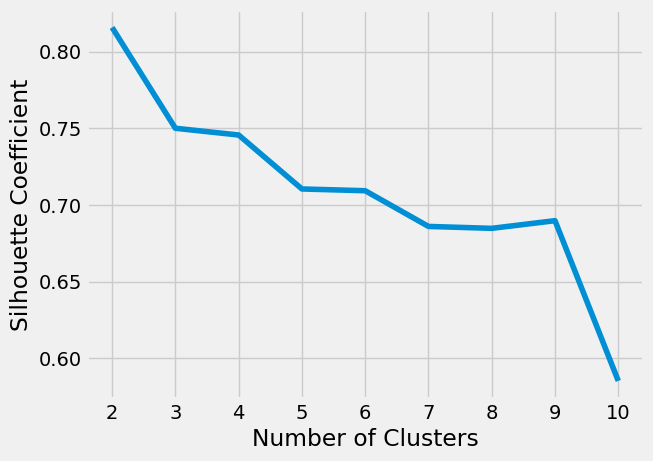

In [28]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [12]:
kl = KneeLocator(
    range(1, 15), sse, curve="convex", direction="decreasing"
)

kl.elbow

5

### Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

df=pd.DataFrame(pd.read_csv("PublicacionsFacebookThailandia.csv", sep=';'))
print(df.head())

                          status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   
3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
4  246675545449582_1645700502213739       photo   4/18/2018 3:22   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  
0          1         1           0  
1          0         0           0  
2          

In [14]:
from scipy.cluster.vq import whiten
numeric_columns = df.select_dtypes(include=[int, float])  # Select only numeric columns
scaled_data = whiten(numeric_columns.to_numpy())

In [15]:
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6,7,8
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,0.497451,0.252206,0.304144,0.478469,0.318454,0.147879,0.176010,0.152587,0.155748
std,1.000071,1.000071,1.000071,1.000071,1.000071,1.000071,1.000071,1.000071,1.000071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036749,0.000000,0.000000,0.037825,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.128623,0.004497,0.000000,0.129049,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.473419,0.025855,0.030397,0.411067,0.075056,0.000000,0.000000,0.000000,0.000000
max,10.181747,23.595571,26.020089,10.479697,16.437289,31.884274,39.677497,31.934025,42.655052


In [16]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage
 
# Use the linkage() function
distance_matrix = linkage(scaled_data, method = 'ward', metric = 'euclidean')

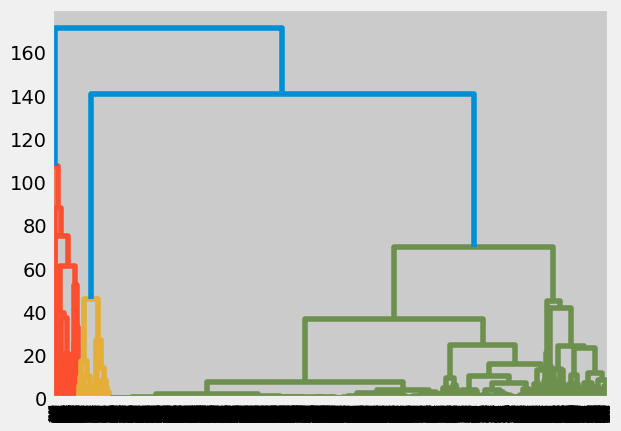

In [31]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram
 
# Create a dendrogram
dn = dendrogram(distance_matrix)
 
# Display the dendogram
plt.show()

### Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [30]:
kmeans_silhouette

0.7585339534922507

In [19]:
from sklearn.metrics import silhouette_score
from scipy.cluster.vq import whiten

cutoff_distance = 4.0
clusters = fcluster(distance_matrix, cutoff_distance, criterion='distance')

silhouette_avg = silhouette_score(scaled_data, clusters)

print(silhouette_avg)

0.4344761032170145


Donat que el coeficient Silhouette és de 0.76 per K-means i 0.43 pel clustering jeràrquic, el primer s'ajusta millor a les dades donat que té un valor més proper a 1. Mentre el segon fa que els clusters se superposin ja que té un valor proper a 0.